In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sets the figure size to (12,6)
plt.rcParams['figure.figsize'] = (12,6)

# Setup
Let's consider the easy case where we only have one input variable.

**y = annual sallary in USD**<br>
**x = years of work_experience**

With the assumed relationship

$$
\hat{annual\_salary} = \hat{b} + \hat{w_1} * years\_of\_work\_experience
$$

We do **not know** the **true relationship**!

# 1) Applications of Linear Regression

$$
\hat{y} = \hat{b} + \hat{w}*x
$$

## 1.1) Prediction

- If a person has 10 years of work experience, what will their annualy salary be?

- Main focus is on $\hat{y}$

## 1.2) Estimation

- What is the effect of an additional year of work experience on the annual salary?

- Main focus is on $\hat{w}$ and $\hat{b}$

# 2) Assumptions of Linear Regression

## A1) The relationship between X and y is linear

The relationship between the dependent variable, y, and the input feature, x, is of the form

$$
y = w_0 + w_1 * x + \epsilon
$$

$$
annual\_sallary = w_0 * 1 + w_1 * years\_of\_work\_experience + \epsilon
$$

or can be linearized. We will talk about how to linearize a relationship in the afternoon.

## A2) The sample is a random sample

A sample is part (or an extraction) of the population.

If this assumption does not hold the information gained is not representative for the whole population and the model **fails to generalize**.

## A3) There is variation in the X variables

The X variable(s) take(s) on different values. Otherwise no information can be gained by looking at X.

# If we are only interested in prediction, these 3 assumptions are sufficient for generalizability!

# If we are interested in estimation we should worry about further assumptions.

## A4) Zero-conditional-mean assumption

The mean of the error term $\epsilon$ conditional on X is 0.

$$
E(\epsilon|X) = 0
$$

There is no relationship between X and the error term $\epsilon$. This is a sophisticated way of saying that we did not fail to include an additional input feature that is correlated with our current input features and explains y.

# Unbiasedness

Under the assumptions A1 - A4 the linear regression estimator is **unbiased**.<br>
Unbiasedness refers to the coefficients. It means that the expected value of the coefficient estimats equals its true value:

$E(\hat{w}|X)=w$

# Create some data for our model

## Assume true relationship

The true relationship between y and input features is

$$
annual\_salary = w_0 + w_1 * years\_of\_work\_experience + w_2 * years\_of\_formal\_education + \epsilon
$$

In [8]:
# Choose a sample size
sample_size = 2000

In [9]:
# Create an array of years_of_formal_education ratings
max_years_of_formal_education = 25
min_years_of_formal_education = 9
factor = 10
years_of_formal_education = np.random.randint(min_years_of_formal_education*factor, 
                                              max_years_of_formal_education*factor,
                                              size=sample_size)/factor

In [45]:
# Create an array of years of work_experience
max_years_of_work_experience = 50
min_years_of_work_experience = 0
years_of_work_experience = np.random.randint(min_years_of_work_experience*factor, 
                                             max_years_of_work_experience*factor, 
                                             size=sample_size)/factor - years_of_formal_education/10 #10 is a scaling factor to not have values be too negative

In [46]:
# Let's calculate the annual salary

# Define the true weights

# b: the baseline salary for a person with 0 yrs of formal educatin and 0 yrs of work exp
w_0 = 20_000

# w_1: the increase in annual salary from an additional yr of work exp
w_1 = 1_000

# w_2: increase in annual salary resulting from 1 yr increase in formal edu
w_2 = 1_000


# create a random error (as array)
error = np.random.normal(size=sample_size)*5_000

# calculate our annual salary according to the true relationship
annual_salary = w_0 + w_1 * years_of_work_experience +  \
                w_2 * years_of_formal_education + error

In [47]:
# combine this in a DataFrame
df = pd.DataFrame({
    'salary': annual_salary,
    'work_experience': years_of_work_experience,
    'education': years_of_formal_education
    })
df.head()

,salary,work_experience,education
0,85975.410224,48.12,15.8
1,77221.957866,41.95,11.5
2,49743.407372,19.78,14.2
3,74058.792622,48.49,9.1
4,73782.594087,39.29,23.1


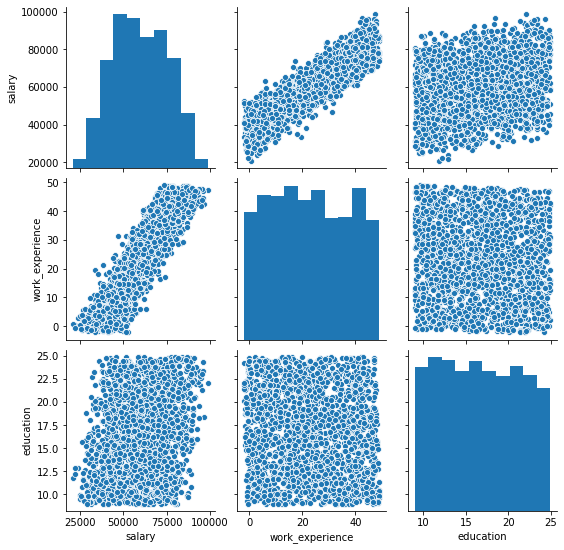

In [48]:
# Plot the relationships
sns.pairplot(df)

<AxesSubplot:xlabel='work_experience', ylabel='salary'>

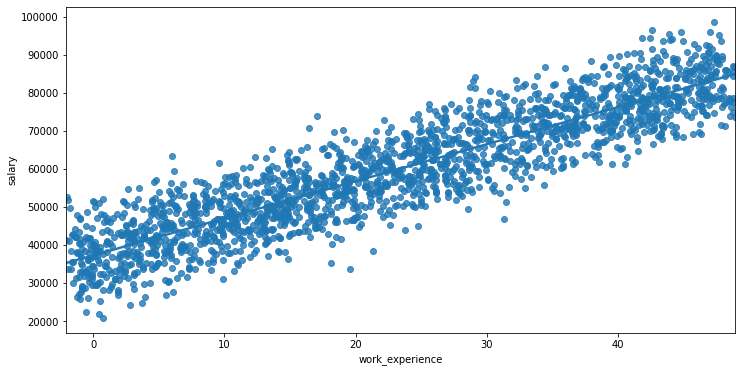

In [49]:
# Plot the relationship between work_experience and salary
sns.regplot(x='work_experience', y='salary', data=df)

#### Let's fit a model

Option 1 - sklearn

In [50]:
# import the model
from sklearn.linear_model import LinearRegression

In [51]:
# Instantiate the model
m = LinearRegression()

In [52]:
# fit the model only on work experience
m.fit(df[['work_experience']], df['salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Make predictions and save them into the DataFrame
df['predictions'] = m.predict(df[['work_experience']])

<AxesSubplot:xlabel='work_experience', ylabel='predictions'>

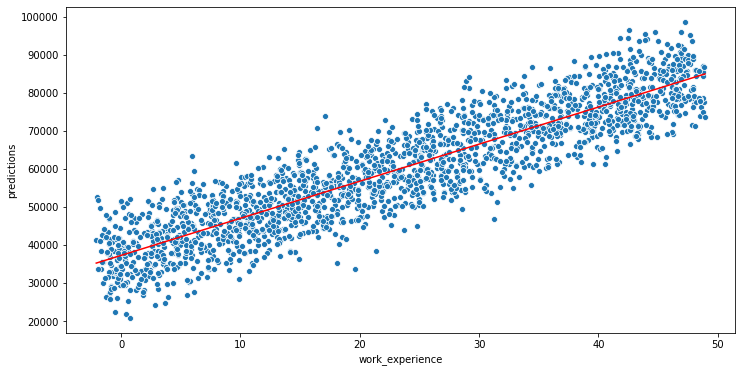

In [54]:
# Plot the real values and the predictions
sns.scatterplot(x='work_experience', y='salary', data=df)
sns.lineplot(x='work_experience', y='predictions', data=df, color='red')

Option 2 - statsmodels

In [55]:
# import the model
from statsmodels.regression.linear_model import OLS #ordinary least squares

In [56]:
# Create an intercept - necessary in statsmodels
df['intercept'] = 1

In [ ]:
X_sm = 

In [57]:
# Instantiate the model
m_sm = OLS(df['salary'], df[['intercept', 'work_experience']] )

In [58]:
# Fit the model and save it in a results variable
result_sm = m_sm.fit()

In [59]:
# Print the results
result_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     8885.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:55:37   Log-Likelihood:                -20454.
No. Observations:                2000   AIC:                         4.091e+04
Df Residuals:                    1998   BIC:                         4.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept        3.728e+04    280.792    132.767      0.000    3.67e+04    3.78e+04
work_experience   975.1494     10.345     94.259      0.000     954.860     995.438
==============================================================================
Omnibus:                       12.719   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.223
Skew:                           0.029   Prob(JB):                      0.00994
Kurtosis:                       2.672   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check whether the assumptions hold

## A1)

We can plot each input feature against y.

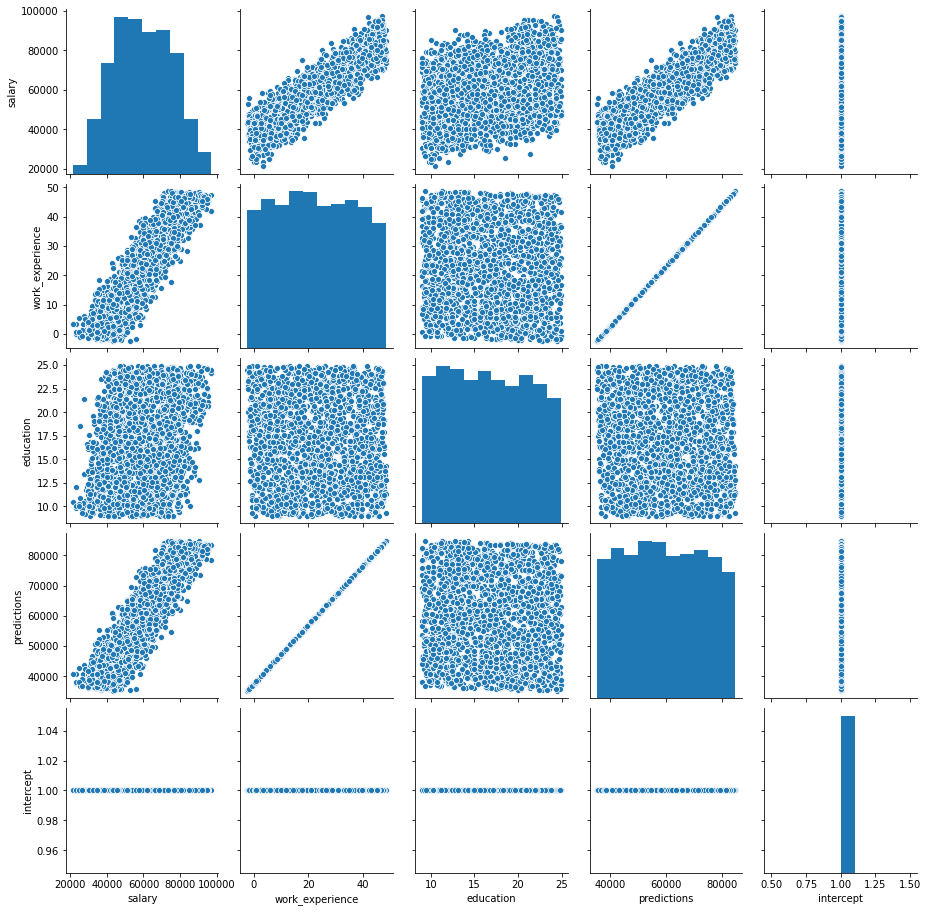

In [35]:
sns.pairplot(df)

### What if the Assumption seems to be violated?

The model will not yield good estimates. Look at an example, e.g. the case where the true relationship is

$annual\_sallary = w_0 + w_1 * years\_of\_work\_experience^3 + years\_of\_formal\_education + \epsilon$

In [36]:
df['salary_cubed'] = w_0 + w_1 * df['work_experience']**3 \
                     + w_2 * df['education']+ error
df.head()

,salary,work_experience,education,predictions,intercept,salary_cubed
0,57631.948817,15.92,15.8,53018.896064,1,4.076579e+06
1,64799.846825,26.55,11.5,63336.634696,1,1.875341e+07
2,50916.159915,13.98,14.2,51135.884498,1,2.769193e+06
3,59989.083853,31.09,9.1,67743.270010,1,3.008012e+07
4,75292.047727,36.09,23.1,72596.392602,1,4.704600e+07


<AxesSubplot:xlabel='work_experience', ylabel='salary_cubed'>

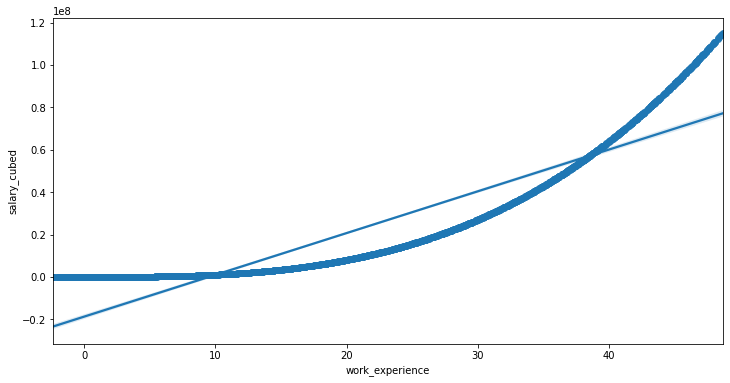

In [37]:
# Plot it with regplot
sns.regplot(x=df['work_experience'], y=df['salary_cubed'], data=df)

### What can we do about it?

Lineraise the relationship

## A2)

It is hard to check for assumption A2. We need to have knowledge about the data collection process.

### When is the assumption violated?

when the data is not randomly drawn

### What can we do if the assumption is violated?

change the data collection process

## A3)

It is easy to check for Assumption A3.

In [38]:
df.nunique()

salary             2000
work_experience    1774
education           160
predictions        1686
intercept             1
salary_cubed       2000
dtype: int64

### What can we do if the assumption is violated?

we cannot use the variable for which it is violated 

## A4)

### When is the assumption violated?

- If there is Omitted Variable Bias

What is **Omitted Variable Bias**? Omitted Variable Bias exists if a feature that is able to explain the outcome variable and is correlated with another input variable is not included in the model. It might be excluded for two reasons:

- We do not have data on the variable
- We chose not to include it

If it is the latter we can solve the problem by just including the feature. If we do not have data on it we have to collect data on it.

In [39]:
# To simulate Omitted Variable Bias we fit a model just using
# work_experience although education has explanatory power as well


We can only detect this Omitted Variable Bias by fitting the model with and without education and by observing the regression table.

In [ ]:
# Correctly specified model

# Further assumptions

We learned under which assumptions the linear regression coefficients are unbiased. Are there more assumptions of interest?

## A5) Homoskedasticity

Homoskedasticity means that the variance of the y does not change over time or over the range of X. To understand Homoskedasticity better, let's have a look at its opposite - Heteroskedasticity.

We go back to our base model but we let the variance increase with the year of work_experience.

#### How do you find out?

- You plot the residuals term against X
- You can use a statistical test (Breusch-Pagan Test)

What the Breusch-Pagan-Test does intuitively:

1. Runs a linear regression of y on X
- It calculates the residuals
- It runs a linear regression of the residuals on X $\hat{\epsilon} = \delta_0 + \delta_1 * years\_of\_work\_experience$
- It uses the $R^2$ value to determine whether the explanatory variables are able to explain the residuals; If that is the case, then we have some kind of heteroscedasticity

## Gauss-Markov-Theorem

If assumptions A1 - A5 hold the resulting estimator will be the Best Unbiased Linear Estimator (BLUE). The "Best" means that it will have the lowest variance of all linear estimators.

## A6) Normal Distribtuion of the Error Terms

This assumption is convenient if we want to make precise statements about effect sizes (the w coefficients of the linear regression).

What if normality fails to hold?

If the sample size is big, then this is not a problem. We can use the Central Limit Theorem and still apply the statistical evaluation.

If the sample size is small, we cannot really make statements about effect sizes.

What is big?
In social science it is often assumed that a big sample is a sample with more than 30 observations.

## A7) No Multicolinearity

If this assumption fails, we still don't have any problems to make predictions. Statements about the coefficients become very difficult if we have multicolinearity.

What is Multicolinearity?<br>
Two features are perfectly colinear, if one is a linear transformation of the other. For example height in cm and height in m would be perfectly colinear.

There will always be correlation between different variables. So when do we consider it to be a problem. - rule of thumb: if corelation is ~0.95 or above you can exclude one